In [10]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import keras
import matplotlib.pyplot as plt

In [15]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [31]:
# re-size all the images to this
IMAGE_SIZE = [640, 640]

train_path = 'Datasets/Train'
valid_path = 'Datasets/Test'

# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [3]:
folders = glob('Datasets/Train/*')
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [4]:
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 640, 640, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 640, 640, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 640, 640, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 320, 320, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 320, 320, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 320, 320, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 160, 160, 128)     0     

In [5]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('Datasets/Train',
                                                 target_size = (640, 640),
                                                 batch_size = 8,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('Datasets/Test',
                                            target_size = (640, 640),
                                            batch_size = 8,
                                            class_mode = 'categorical')



Found 300 images belonging to 12 classes.
Found 36 images belonging to 12 classes.


In [6]:
r=model.fit_generator(training_set,
                         epochs = 30,
                         validation_data = test_set,
                         validation_steps = 25)


C:\Users\Dhiyanesh\AppData\Local\Temp\ipykernel_50512\815010719.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r=model.fit_generator(training_set,


Epoch 1/30
38/38 [==============================] - 33s 578ms/step - loss: 24.6656 - accuracy: 0.1333 - val_loss: 11.3757 - val_accuracy: 0.2500
Epoch 2/30
38/38 [==============================] - 15s 377ms/step - loss: 6.6784 - accuracy: 0.4433
Epoch 3/30
38/38 [==============================] - 16s 404ms/step - loss: 3.3504 - accuracy: 0.5967
Epoch 4/30
38/38 [==============================] - 15s 385ms/step - loss: 2.8297 - accuracy: 0.6667
Epoch 5/30
38/38 [==============================] - 15s 394ms/step - loss: 3.1319 - accuracy: 0.7133
Epoch 6/30
38/38 [==============================] - 15s 388ms/step - loss: 2.1548 - accuracy: 0.7633
Epoch 7/30
38/38 [==============================] - 15s 392ms/step - loss: 4.0810 - accuracy: 0.6900
Epoch 8/30
38/38 [==============================] - 15s 390ms/step - loss: 2.0432 - accuracy: 0.8000
Epoch 9/30
38/38 [==============================] - 15s 380ms/step - loss: 1.3958 - accuracy: 0.8300
Epoch 10/30
38/38 [============================

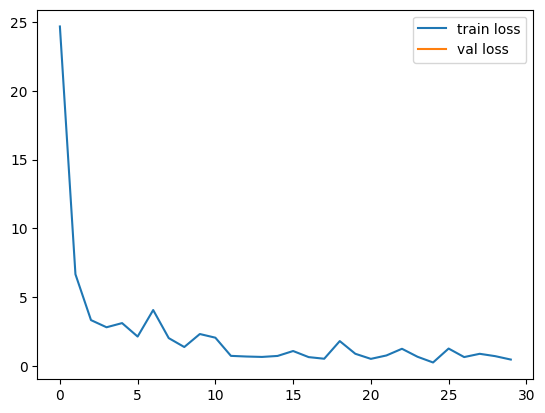

<Figure size 640x480 with 0 Axes>

In [7]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

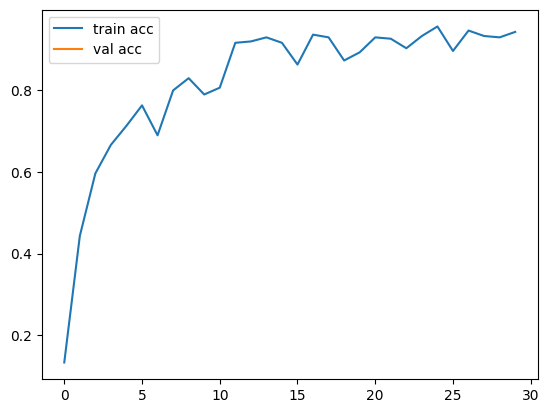

<Figure size 640x480 with 0 Axes>

In [8]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [10]:
import tensorflow as tf
from keras.models import load_model
model.save('vgg.h5')

In [11]:
model = keras.models.load_model('vgg.h5')

In [16]:
img=image.load_img('bq.JPG',target_size=(640,640))

In [17]:
x=image.img_to_array(img)
x

array([[[ 35., 100.,  57.],
        [ 29.,  94.,  51.],
        [ 32.,  97.,  55.],
        ...,
        [ 35.,  91.,  54.],
        [ 33.,  89.,  52.],
        [ 36.,  92.,  55.]],

       [[ 42.,  97.,  55.],
        [ 40.,  95.,  53.],
        [ 34.,  89.,  49.],
        ...,
        [ 35.,  93.,  55.],
        [ 31.,  89.,  51.],
        [ 31.,  89.,  51.]],

       [[ 56.,  91.,  51.],
        [ 72., 107.,  67.],
        [ 67., 101.,  64.],
        ...,
        [ 35.,  95.,  59.],
        [ 26.,  86.,  50.],
        [ 23.,  83.,  47.]],

       ...,

       [[  4.,  38.,  11.],
        [  4.,  38.,  11.],
        [  7.,  41.,  14.],
        ...,
        [  6., 116.,  79.],
        [ 10., 120.,  83.],
        [ 22., 132.,  95.]],

       [[  3.,  39.,  11.],
        [  9.,  45.,  17.],
        [ 14.,  48.,  21.],
        ...,
        [ 18., 128.,  91.],
        [ 12., 122.,  85.],
        [ 16., 126.,  89.]],

       [[  8.,  44.,  16.],
        [ 12.,  48.,  20.],
        [ 15.,  

In [18]:
x.shape

(640, 640, 3)

In [19]:
x=x/255

In [20]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 640, 640, 3)

In [23]:
prediction=model.predict(img_data)

1/1 [==============================] - 0s 20ms/step


In [26]:
max_index = np.argmax(prediction)
max_index

9